In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotnine
from plotnine import *
from plotnine.data import *
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn import preprocessing

from imblearn.over_sampling import SMOTENC
from collections import Counter

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_curve, auc
from sklearn.metrics import classification_report

from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

C:\Users\fayru\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [2]:
# Import dataset after initial processing form R
mydata0 = pd.read_csv("df8.csv")
mydata=mydata0.copy()

# View the first few rows of the data
#mydata.info()

In [3]:
#Scaler=StandardScaler()
#X=Scaler.fit_transform(mydata) # min max scaling was already done in R

label_col=mydata['NSP'] # defining the label column
data_col=mydata.iloc[:, 0:32] # defining the feature columns #32 #28:31]


In [4]:
# splitting data into test train 70/30 split

X_train,X_test,y_train,y_test=train_test_split(data_col,label_col,test_size=0.3 ,random_state=42, stratify=label_col)

In [5]:
# Saving the test train split for plotting in R
X_y_train_combined = pd.concat([X_train,y_train], axis=1)
X_y_test_combined = pd.concat([X_test,y_test], axis=1)
X_y_train_combined.to_csv('X_y_train_combined.csv',index=False)
X_y_test_combined.to_csv('X_y_test_combined.csv',index=False)

In [6]:
#X_train.info()
#len(label_col.index)
print(len(X_train.index)+len(X_test.index)) # check the split numbers

2126


In [7]:
print(sorted(Counter(y_test).items()))# check the class distributionin the stratified test set

[(1, 497), (2, 88), (3, 53)]


In [8]:
#defining the classifiers with standard hyperparameters

dc_clf = tree.DecisionTreeClassifier(max_depth=5)
rnd_clf=RandomForestClassifier()
svm_clf=SVC(kernel="poly",degree=6,coef0=5,gamma=0.1)
xgb_clf=XGBClassifier(learning_rate=0.001, verbosity = 0)

****************************** DecisionTreeClassifier ******************************



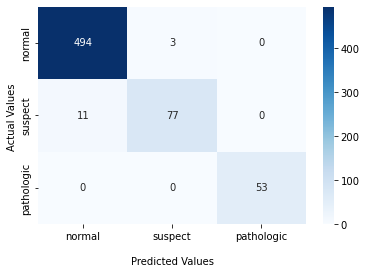



              precision    recall  f1-score   support

           1       0.98      0.99      0.99       497
           2       0.96      0.88      0.92        88
           3       1.00      1.00      1.00        53

    accuracy                           0.98       638
   macro avg       0.98      0.96      0.97       638
weighted avg       0.98      0.98      0.98       638
 

****************************** RandomForestClassifier ******************************



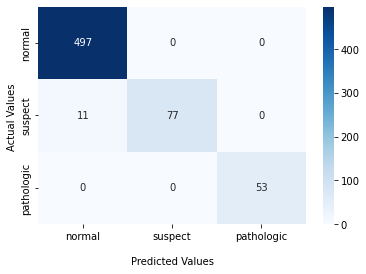



              precision    recall  f1-score   support

           1       0.98      1.00      0.99       497
           2       1.00      0.88      0.93        88
           3       1.00      1.00      1.00        53

    accuracy                           0.98       638
   macro avg       0.99      0.96      0.97       638
weighted avg       0.98      0.98      0.98       638
 

****************************** SVC ******************************



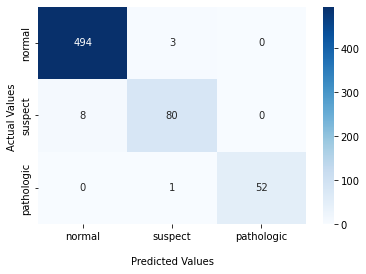



              precision    recall  f1-score   support

           1       0.98      0.99      0.99       497
           2       0.95      0.91      0.93        88
           3       1.00      0.98      0.99        53

    accuracy                           0.98       638
   macro avg       0.98      0.96      0.97       638
weighted avg       0.98      0.98      0.98       638
 

****************************** XGBClassifier ******************************



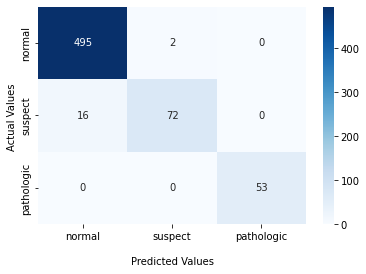



              precision    recall  f1-score   support

           1       0.97      1.00      0.98       497
           2       0.97      0.82      0.89        88
           3       1.00      1.00      1.00        53

    accuracy                           0.97       638
   macro avg       0.98      0.94      0.96       638
weighted avg       0.97      0.97      0.97       638
 



In [9]:
# training and testing data with the classifiers

for clf in (dc_clf, rnd_clf, svm_clf, xgb_clf):
    clf.fit(X_train, y_train)# fitting original imbalanced
    y_pred = clf.predict(X_test)
    
    print("******************************",clf.__class__.__name__,"******************************\n")
    
    cf_matrix = confusion_matrix(y_test,y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, fmt='g', ax=None, cmap='Blues')
    #ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['normal', 'suspect','pathologic'])
    ax.yaxis.set_ticklabels(['normal', 'suspect','pathologic'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    print("\n")
    
    #print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    #print(clf.__class__.__name__, recall_score(y_test,y_pred,average="weighted"))
    #print(clf.__class__.__name__, precision_score(y_test,y_pred,average='weighted'))
    print( classification_report(y_test,y_pred),"\n")   

In [10]:
### NOW WORKING WITH THE NON EXPERT DATA ONLY

In [11]:
label_col2=mydata['NSP'] # defining the label column
data_col2=mydata.iloc[:, 0:21] # defining the feature columns without expert classification
#data_col2.info()

In [12]:
# splitting data into test train 70/30 split

X_train2,X_test2,y_train2,y_test2=train_test_split(data_col2,label_col2,test_size=0.3 ,random_state=42, stratify=label_col2)

****************************** DecisionTreeClassifier ******************************



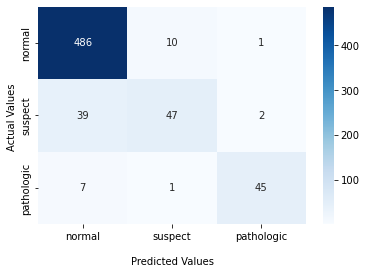



              precision    recall  f1-score   support

           1       0.91      0.98      0.94       497
           2       0.81      0.53      0.64        88
           3       0.94      0.85      0.89        53

    accuracy                           0.91       638
   macro avg       0.89      0.79      0.83       638
weighted avg       0.90      0.91      0.90       638
 

****************************** RandomForestClassifier ******************************



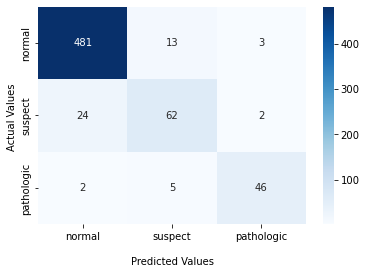



              precision    recall  f1-score   support

           1       0.95      0.97      0.96       497
           2       0.78      0.70      0.74        88
           3       0.90      0.87      0.88        53

    accuracy                           0.92       638
   macro avg       0.88      0.85      0.86       638
weighted avg       0.92      0.92      0.92       638
 

****************************** SVC ******************************



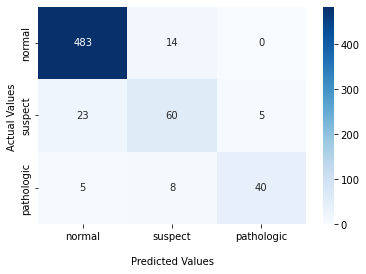



              precision    recall  f1-score   support

           1       0.95      0.97      0.96       497
           2       0.73      0.68      0.71        88
           3       0.89      0.75      0.82        53

    accuracy                           0.91       638
   macro avg       0.86      0.80      0.83       638
weighted avg       0.91      0.91      0.91       638
 

****************************** XGBClassifier ******************************



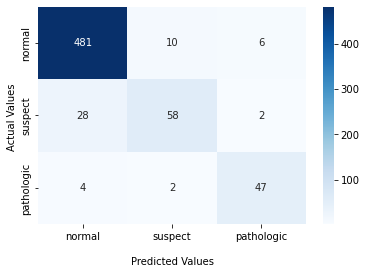



              precision    recall  f1-score   support

           1       0.94      0.97      0.95       497
           2       0.83      0.66      0.73        88
           3       0.85      0.89      0.87        53

    accuracy                           0.92       638
   macro avg       0.87      0.84      0.85       638
weighted avg       0.92      0.92      0.92       638
 



In [13]:
# training and testing CTG meachine only data with the classifiers

for clf in (dc_clf, rnd_clf, svm_clf, xgb_clf):

    clf.fit(X_train2, y_train2)# fitting original imbalanced without expert data
    y_pred2 = clf.predict(X_test2)
    
    print("******************************",clf.__class__.__name__,"******************************\n")
    
    cf_matrix = confusion_matrix(y_test2,y_pred2)
    ax = sns.heatmap(cf_matrix, annot=True, fmt='g', ax=None, cmap='Blues')
    #ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['normal', 'suspect','pathologic'])
    ax.yaxis.set_ticklabels(['normal', 'suspect','pathologic'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    print("\n")
    
    #print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    #print(clf.__class__.__name__, recall_score(y_test,y_pred,average="weighted"))
    #print(clf.__class__.__name__, precision_score(y_test,y_pred,average='weighted'))
    print( classification_report(y_test2,y_pred2),"\n")   

In [14]:
# HYPER PARAMETER TUNING USING SMOTE-NC UPSAMPLING OF EACH FOLD IN A 10 X CROSS VALIDATION MODEL RANDOM FOREST

# change rand ints, fix to stratified 10 folds, upsample using smote nc
# change optimizing by validation score F1 

In [15]:
# function to upsample each fold using SMOTE-NC and 10 x cross validate

def score_model(model, X_train, y_train, params, cv):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (recall) scores
    """

    smoter = SMOTENC(categorical_features=[20], random_state=12) # over sampling using SMOTE-NC
  
    scores = []

    for train_fold_index, val_fold_index in cv.split(X_train, y_train): 
        # Get the training data
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train.iloc[train_fold_index]
        # Get the validation data
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train.iloc[val_fold_index]

        # Upsample only the data in the training fold 
        X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold, y_train_fold)
        # Fit the model on the upsampled training data
        model_obj = model(**params).fit(X_train_fold_upsample, y_train_fold_upsample)
        y_val_fold_pred = model_obj.predict(X_val_fold)
        
        # Score(f1) the model on the (non-upsampled) validation data

        score = f1_score(y_val_fold, y_val_fold_pred, average=None)[2]      
        scores.append(score)
    return np.array(scores)

In [16]:
# creating same folds everytime, 10 x fold

kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
#kf = KFold(n_splits=5, random_state=None, shuffle=False)

In [17]:
# defining some hyper parameters to test

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
}

In [19]:
# getting the model best hyper parameters data

#score_model(RandomForestClassifier, example_params, cv=kf)

score_tracker = []
for n_estimators in params['n_estimators']:
    for max_depth in params['max_depth']:
        example_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'random_state': 13
        }
        example_params['f1'] = score_model(RandomForestClassifier, X_train2, y_train2, example_params, kf).mean()
        score_tracker.append(example_params)

In [20]:
# What's the best model?
best_ps=sorted(score_tracker, key=lambda x: x['f1'], reverse=True)[0]
print(best_ps)

{'n_estimators': 100, 'max_depth': 10, 'random_state': 13, 'f1': 0.9342931995540692}


In [22]:
# TESTING ON TEST DATA WITH OPTIMIZED PARAMETERS

In [23]:
# hyperparameter optimized rf model

rf = RandomForestClassifier(n_estimators=best_ps.get("n_estimators"), max_depth=best_ps.get("max_depth"), random_state=9) 

In [24]:
# fitting the optimized model to the entire upsampled train set

smote_nc = SMOTENC(categorical_features=[20], random_state=15)
X_train_upsample, y_train_upsample = smote_nc.fit_resample(X_train2, y_train2)

****************************** RandomForestClassifier 100% train upsampling ******************************



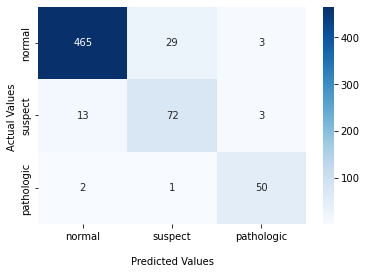



              precision    recall  f1-score   support

           1       0.97      0.94      0.95       497
           2       0.71      0.82      0.76        88
           3       0.89      0.94      0.92        53

    accuracy                           0.92       638
   macro avg       0.86      0.90      0.88       638
weighted avg       0.93      0.92      0.92       638
 



In [25]:
#fitting fully balanced over sampled train set and results

rf.fit(X_train_upsample, y_train_upsample)
y_pred2 = rf.predict(X_test2)

print("******************************",rf.__class__.__name__,"100% train upsampling ******************************\n")
cf_matrix = confusion_matrix(y_test2,y_pred2)
ax = sns.heatmap(cf_matrix, annot=True, fmt='g', ax=None, cmap='Blues')
#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['normal', 'suspect','pathologic'])
ax.yaxis.set_ticklabels(['normal', 'suspect','pathologic'])

## Display the visualization of the Confusion Matrix.
plt.show()
print("\n")
    
#print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
#print(clf.__class__.__name__, recall_score(y_test,y_pred,average="weighted"))
#print(clf.__class__.__name__, precision_score(y_test,y_pred,average='weighted'))
print( classification_report(y_test2,y_pred2),"\n")   

In [26]:
# how much imbalance is ok for upsampling?

C=3

tTdata=len(y_train2)

tn1=len(y_train.index[y_train2.eq(1)])
tn2=len(y_train.index[y_train2.eq(2)])
tn3=len(y_train.index[y_train2.eq(3)])

timbalanceStat=abs(((1/C)-(tn1/tTdata)))+abs(((1/C)-(tn2/tTdata)))+abs(((1/C)-(tn3/tTdata)))

imbalanceStatDesired=0.39

# assuming desired n2 = n3
desired_n3 = -(((imbalanceStatDesired-abs(1/C-tn1/tTdata))/2)-1/C)*tTdata


print("Number of instances of NSP = 3 desired in the training data is",round(desired_n3,0),"to maintain an imbalance stat of",imbalanceStatDesired)



Number of instances of NSP = 3 desired in the training data is 537.0 to maintain an imbalance stat of 0.39


In [27]:
#changing/reducing upsampling amount for class 2 and 3

N = int(tn1 - desired_n3)
np.random.seed(1100)
drop2=np.random.choice(y_train_upsample.index[y_train_upsample.eq(2)],N, replace=False)
                     
X_train_less_up_2 = X_train_upsample.drop(drop2)
y_train_less_up_2 = y_train_upsample.drop(drop2)
                     
drop3=np.random.choice(y_train_less_up_2.index[y_train_less_up_2.eq(3)],N, replace=False)
                     
X_train_upsample_less = X_train_less_up_2.drop(drop3)
y_train_upsample__less = y_train_less_up_2.drop(drop3)

In [28]:
y_train_upsample__less.eq(1).sum()  # checking whether the desirer number of oversampled data were obtained

1158

In [29]:
y_train_upsample__less.eq(3).sum()  # checking whether the desirer number of oversampled data were obtained

537

****************************** RandomForestClassifier 0.39 train imbalance upsampling ******************************



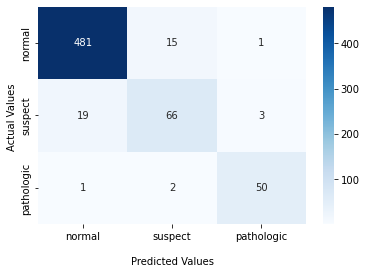



              precision    recall  f1-score   support

           1       0.96      0.97      0.96       497
           2       0.80      0.75      0.77        88
           3       0.93      0.94      0.93        53

    accuracy                           0.94       638
   macro avg       0.89      0.89      0.89       638
weighted avg       0.93      0.94      0.94       638
 



In [30]:
#fitting reduced over sampled train set and results

rf.fit(X_train_upsample_less, y_train_upsample__less)
y_pred2 = rf.predict(X_test2)

print("******************************",rf.__class__.__name__,imbalanceStatDesired,"train imbalance upsampling ******************************\n")

cf_matrix = confusion_matrix(y_test2,y_pred2)
ax = sns.heatmap(cf_matrix, annot=True, fmt='g', ax=None, cmap='Blues')
#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['normal', 'suspect','pathologic'])
ax.yaxis.set_ticklabels(['normal', 'suspect','pathologic'])

## Display the visualization of the Confusion Matrix.
plt.show()
print("\n")
    
#print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
#print(clf.__class__.__name__, recall_score(y_test,y_pred,average="weighted"))
#print(clf.__class__.__name__, precision_score(y_test,y_pred,average='weighted'))
print( classification_report(y_test2,y_pred2),"\n")   